### jupyter notebook for the exploratory data analysis of the onet data

author: Jan Jörg
date: 14.03.2024

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import json
from itertools import chain
from db import get_database

In [31]:
dbname = get_database()
collection = dbname["with_id"]
education = dbname["education"]
job_zone = dbname["job_zone"]

documents = collection.find()
education =  pd.DataFrame(list(education.find()))
job_zone = pd.DataFrame(list(job_zone.find()))
df = pd.DataFrame(list(documents))

df.head(2)

,_id,job_zone,education,isco08,Name_de,s1,s2,s3,s4,s5,...,a43,a44,a45,a46,a47,a48,a49,a50,a51,a52
0,662f495f6ad0038ed71eb00e,1,1,2655,Schauspieler,72,72,69,69,50,...,0,0,0,0,0,0,0,0,0,0
1,662f495f6ad0038ed71eb00f,2,2,2120,"Mathematiker, Aktuare und Statistiker",81,72,75,50,81,...,0,91,0,0,0,0,0,0,0,0


In [32]:
df['education'] = df['education'].astype(int)
df['job_zone'] = df['job_zone'].astype(int)

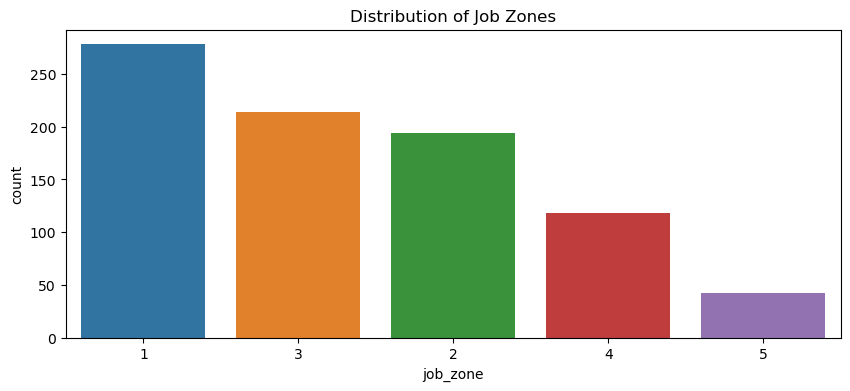

Zone 1:  These occupations usually require a high school diploma.
Zone 2:  Most of these occupations require a four-year bachelor's degree, but some do not.
Zone 3:  Most occupations in this zone require training in vocational schools, related on-the-job experience, or an associate's degree.
Zone 4:  Most of these occupations require graduate school. For example, they may require a master's degree, and some require a Ph.D., M.D., or J.D. (law degree).
Zone 5:  Some of these occupations may require a high school diploma or GED certificate.


In [33]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='job_zone', order = df['job_zone'].value_counts().index)
plt.title('Distribution of Job Zones')
plt.show()

for i, row in job_zone.iterrows():
    print(f"Zone {row['job_zone_id']}:  {row['education']}")

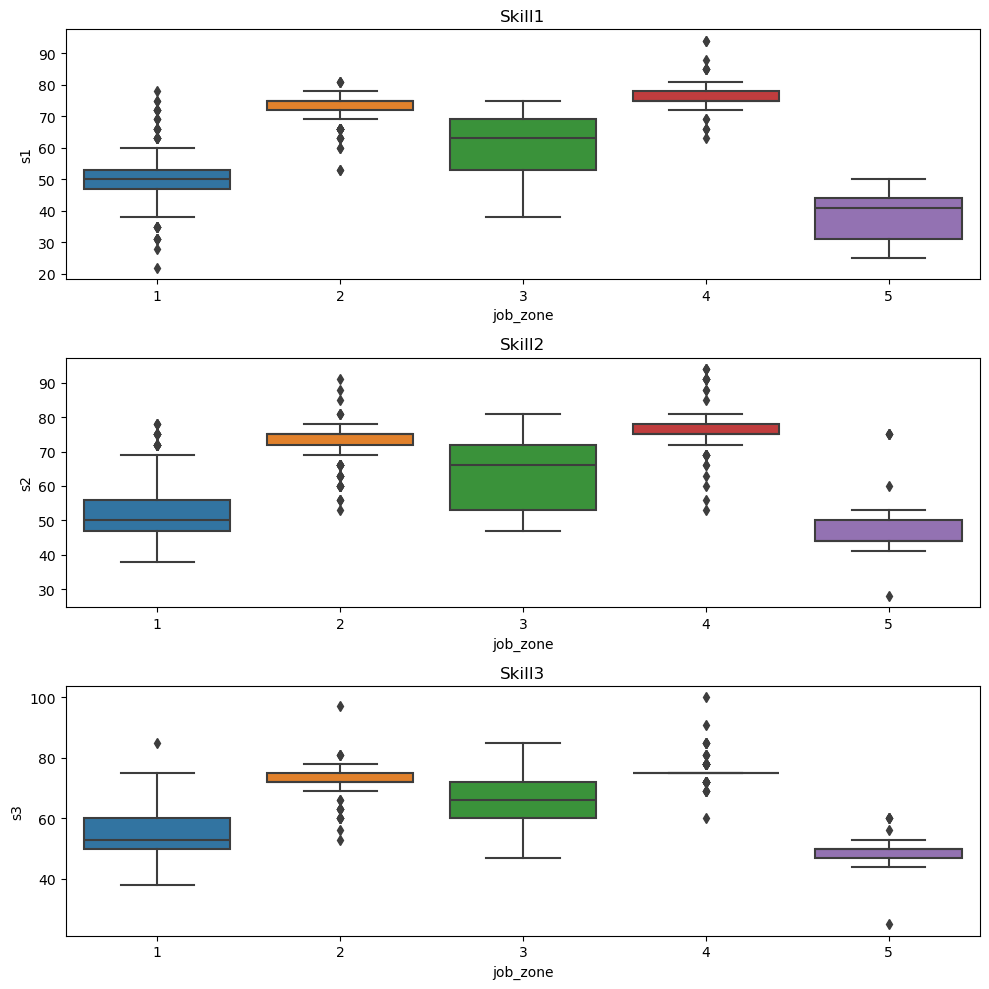

In [34]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

for i in range(1, 4):
    sns.boxplot(x='job_zone', y=f's{i}', data=df, ax=axs[i-1])
    axs[i-1].set_title(f'Skill{i}')

plt.tight_layout()
plt.show()

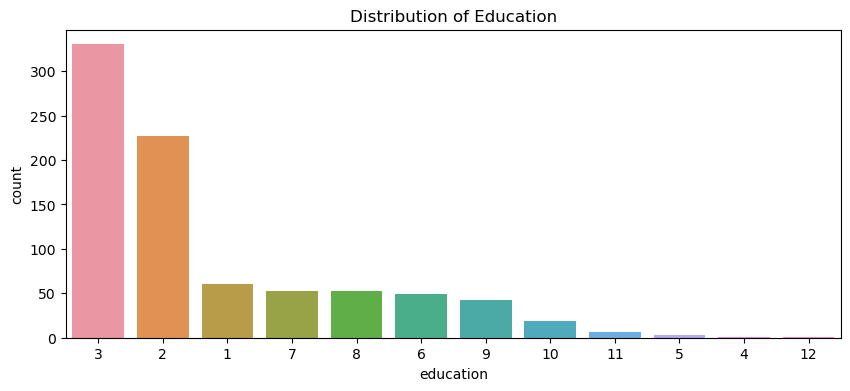

1:  Less than high school diploma
2:  Bachelor's degree
3:  High school diploma or equivalent
4:  Post-baccalaureate certificate
5:  Professional degree
6:  Associate's degree
7:  Master's degree
8:  Post-secondary certificate
9:  Doctoral degree
10:  Some college, no degree
11:  Post-doctoral training
12:  Post-master's certificate


In [35]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='education', order = df['education'].value_counts().index)
plt.title('Distribution of Education')
plt.show()

for i, row in education.iterrows():
    print(f"{row['education_id']}:  {row['name']}")

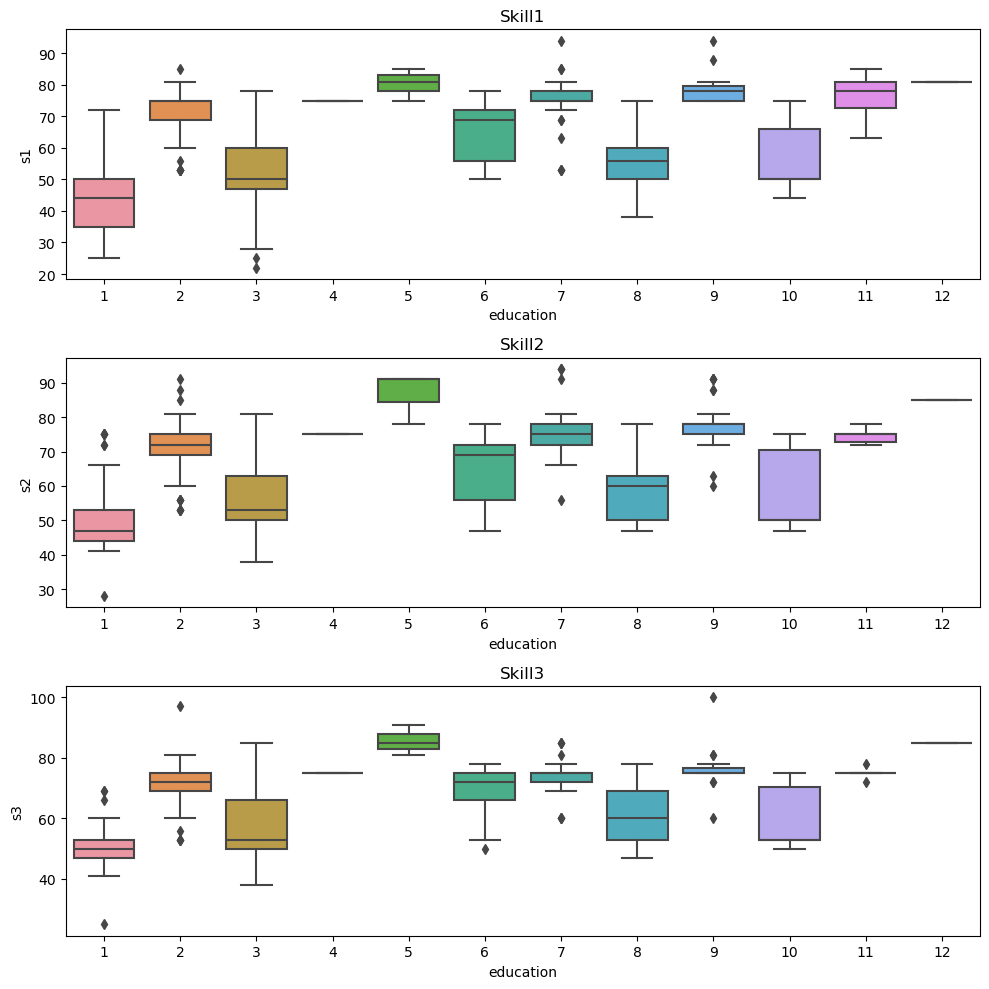

In [36]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

for i in range(1, 4):
    sns.boxplot(x='education', y=f's{i}', data=df, ax=axs[i-1])
    axs[i-1].set_title(f'Skill{i}')

plt.tight_layout()
plt.show(5)